<a href="https://colab.research.google.com/github/timothy-87/Group-1-Tasks/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
df = pd.read_excel('C:\\Users\\TIMOTHY OKETCH\\OneDrive\\Data Science\\Prac\\Group-1-Tasks\\' \
    'Students Performance.xlsx', sheet_name = None) # use double back slashes when using desktop file path
# df = pd.read_excel('/content/Students Performance.xlsx', sheet_name = None) # use in colab
df
#understand the data
## Student test results data
#Objectives
## Student performance across various categories
## Factors influencing student performance

{'Group A':     gender race/ethnicity parental level of education         lunch  \
 0     male        group A          associate's degree  free/reduced   
 1     male        group A                some college      standard   
 2   female        group A             master's degree      standard   
 3     male        group A             master's degree  free/reduced   
 4   female        group A          associate's degree      standard   
 ..     ...            ...                         ...           ...   
 84  female        group A                some college      standard   
 85  female        group A                some college      standard   
 86    male        group A                 high school      standard   
 87  female        group A            some high school  free/reduced   
 88    male        group A                 high school      standard   
 
    test preparation course  math score  reading score  writing score  
 0                     none          47            

# Observations
## The students performed best in reading with a mean of 69.169 and poorest in maths with a mean of 66.089.

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


Text(0.5, 1.0, 'Average Scores per Subject')

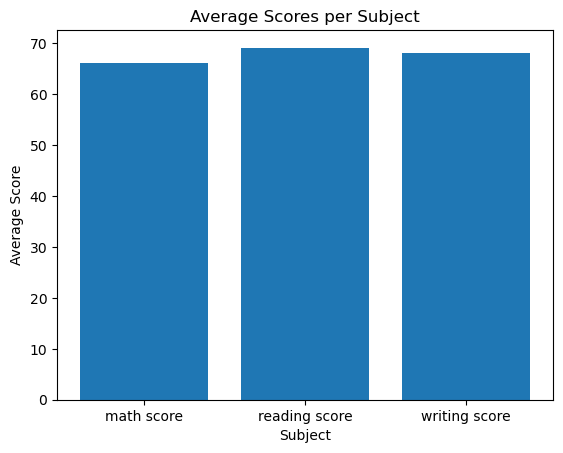

In [4]:
#Objective 1 student across various categories
# Student performance by subject
Group_a = df['Group A']
Group_b = df['Group B']
Group_c = df['Group C']
Group_d = df['Group D']
Group_e = df['Group E']
combined = pd.concat([Group_a, Group_b, Group_c, Group_d, Group_e], ignore_index = True)
subjects = ['math score', 'reading score', 'writing score']
average_scores_subject = combined[['math score', 'reading score', 'writing score']].mean()
print(average_scores_subject)
plt.bar(subjects, average_scores_subject)
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.title('Average Scores per Subject')


# Observations
## The male students performed better in Maths while the Female students performed better in reading and writing as shown in the visual below.

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<Axes: xlabel='gender'>

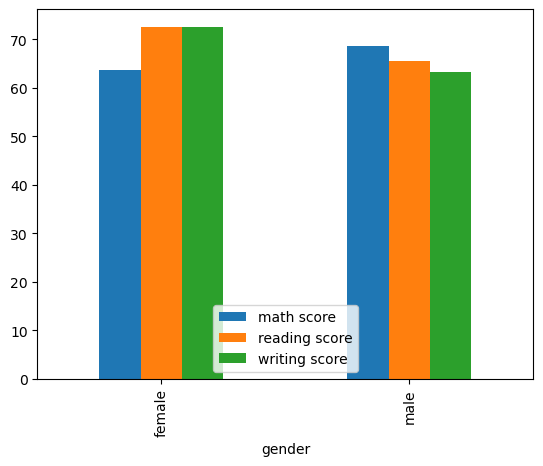

In [5]:
# Student performance by gender

average_scores_gender = combined.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_gender)

average_scores_gender.plot(kind = 'bar')

# Observations
## Group E had the highest average score across all three subjects while Group A had the lowest average scores across all three subjects.

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


<Axes: xlabel='race/ethnicity'>

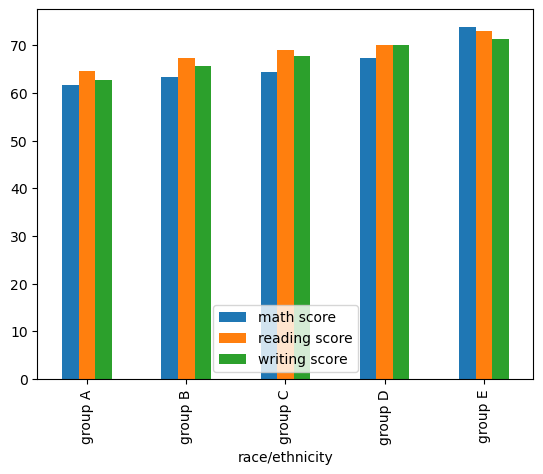

In [6]:
# Student performance by race
average_scores_race = combined.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_race)
average_scores_race.plot(kind = 'bar')

In [7]:
#Objective 2
## Does parental level of education affect performance & to what effect
## Does Lunch package affect performance & to what effect
## Does test preparation affect performance & to what effect

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


<Axes: xlabel='parental level of education'>

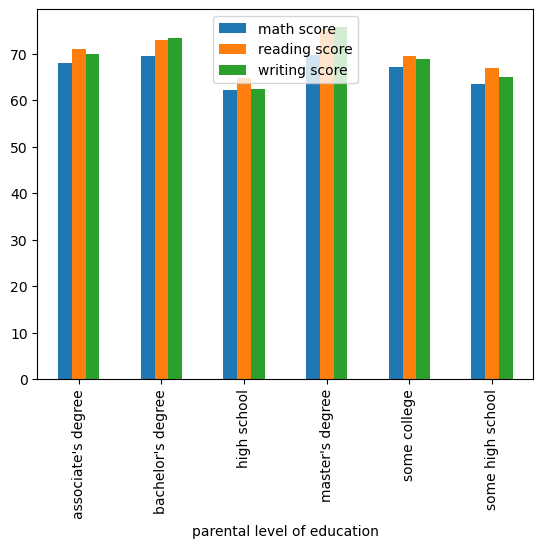

In [8]:
#Objective 2.1
average_scores_parent = combined.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_parent)
average_scores_parent.plot(kind = 'bar')


In [13]:
# Map the education levels to numbers
education_map = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree" : 5,
    "master's degree" : 6
}

# Create a new column with the numeric values
combined['education_code'] = combined['parental level of education'].map(education_map)

#preview
combined


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,education_code
0,male,group A,associate's degree,free/reduced,none,47,57,44,4
1,male,group A,some college,standard,completed,78,72,70,3
2,female,group A,master's degree,standard,none,50,53,58,6
3,male,group A,master's degree,free/reduced,none,73,74,72,6
4,female,group A,associate's degree,standard,completed,55,65,62,4
...,...,...,...,...,...,...,...,...,...
995,female,group E,associate's degree,standard,none,100,100,100,4
996,female,group E,associate's degree,standard,none,68,76,67,4
997,male,group E,some high school,standard,completed,81,75,76,1
998,male,group E,high school,free/reduced,completed,86,81,75,2


In [14]:
# calculating covariance and correlation
cov_math = np.cov(combined['education_code'],combined['math score'])
corr = combined[['education_code','math score','reading score','writing score']].corr()

print(cov_math)
print(corr)



[[  2.13257157   3.53032132]
 [  3.53032132 229.918998  ]]
                education_code  math score  reading score  writing score
education_code        1.000000    0.159432       0.190908       0.236715
math score            0.159432    1.000000       0.817580       0.802642
reading score         0.190908    0.817580       1.000000       0.954598
writing score         0.236715    0.802642       0.954598       1.000000


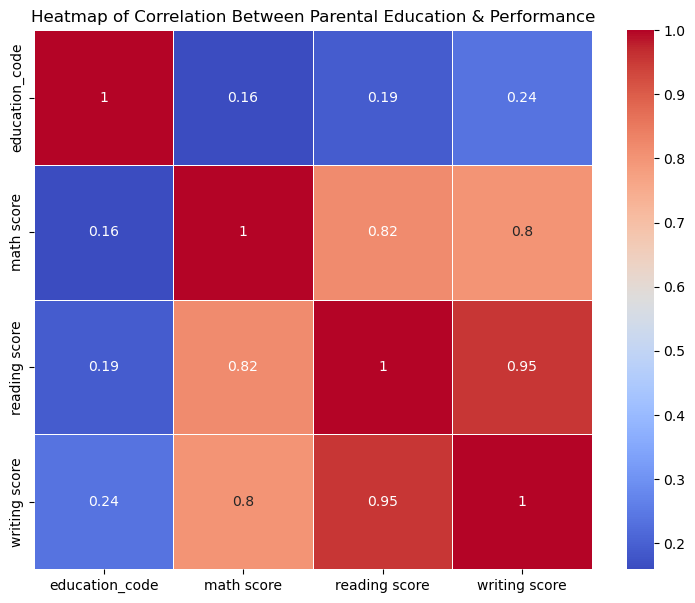

In [15]:
# Plot heatmap
plt.figure(figsize=(9, 7))
sb.heatmap(corr,
            annot=True,        # Show correlation values inside boxes
            cmap='coolwarm',  # Color scheme
            linewidth =0.5,
            xticklabels=True,  # Show column names (optional, True by default)
            yticklabels=True   # Show row names (optional, True by default)
           )
plt.title("Heatmap of Correlation Between Parental Education & Performance")
plt.show()

In [27]:
# Plot heatmap 1.0

avg_scores_by_parent_edu = combined.groupby('education_code')[['math score', 'writing score', 'reading score']].mean()


## Ordering education level
education_order = [1, 2, 3, 4, 5, 6]  # Corresponds to mapped education codes

avg_scores_by_parent_edu = avg_scores_by_parent_edu.loc[education_order]
print(avg_scores_by_parent_edu)

                math score  writing score  reading score
education_code                                          
1                63.497207      64.888268      66.938547
2                62.137755      62.448980      64.704082
3                67.128319      68.840708      69.460177
4                67.882883      69.896396      70.927928
5                69.389831      73.381356      73.000000
6                69.745763      75.677966      75.372881


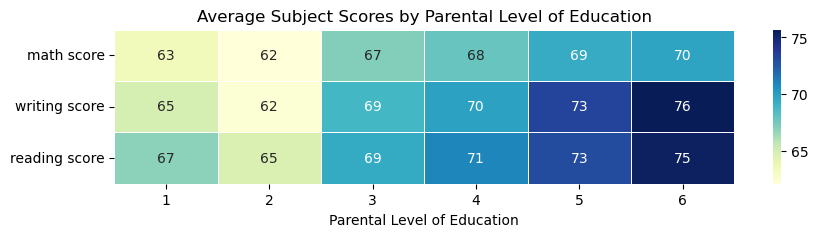

In [30]:
#Plotting the heatmap
plt.figure(figsize=(10, 2))  # Wide but short, since only 1 row
sb.heatmap(avg_scores_by_parent_edu.T,
            annot=True,
            cmap="YlGnBu",  # Yellow-Green-Blue color map
            linewidths=0.5)

plt.title("Average Subject Scores by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("")

plt.show()

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


<Axes: xlabel='lunch'>

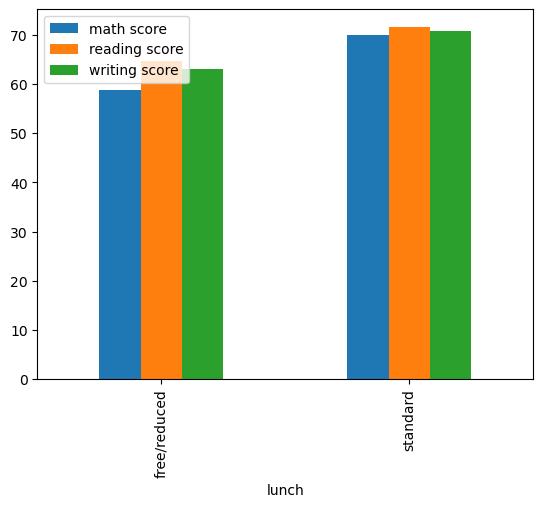

In [19]:
# Objective 2.2
average_scores_lunch = combined.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_lunch)
average_scores_lunch.plot(kind = 'bar')

In [20]:
# Map the lunch category to numbers
lunch_category = {
    "free/reduced": 1,
    "standard":2
}

# Create a new column with the numeric values
combined['lunch_code'] = combined['lunch'].map(lunch_category)

# preview
combined



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,education_code,lunch_code
0,male,group A,associate's degree,free/reduced,none,47,57,44,4,1
1,male,group A,some college,standard,completed,78,72,70,3,2
2,female,group A,master's degree,standard,none,50,53,58,6,2
3,male,group A,master's degree,free/reduced,none,73,74,72,6,1
4,female,group A,associate's degree,standard,completed,55,65,62,4,2
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,associate's degree,standard,none,100,100,100,4,2
996,female,group E,associate's degree,standard,none,68,76,67,4,2
997,male,group E,some high school,standard,completed,81,75,76,1,2
998,male,group E,high school,free/reduced,completed,86,81,75,2,1


In [21]:
# calculating covariance and correlation
cov_math = np.cov(combined['lunch_code'],combined['math score'])
corr = combined[['lunch_code','math score','reading score','writing score']].corr()
print(cov_math)
print(corr)

[[2.29204204e-01 2.54714214e+00]
 [2.54714214e+00 2.29918998e+02]]
               lunch_code  math score  reading score  writing score
lunch_code       1.000000    0.350877       0.229560       0.245769
math score       0.350877    1.000000       0.817580       0.802642
reading score    0.229560    0.817580       1.000000       0.954598
writing score    0.245769    0.802642       0.954598       1.000000


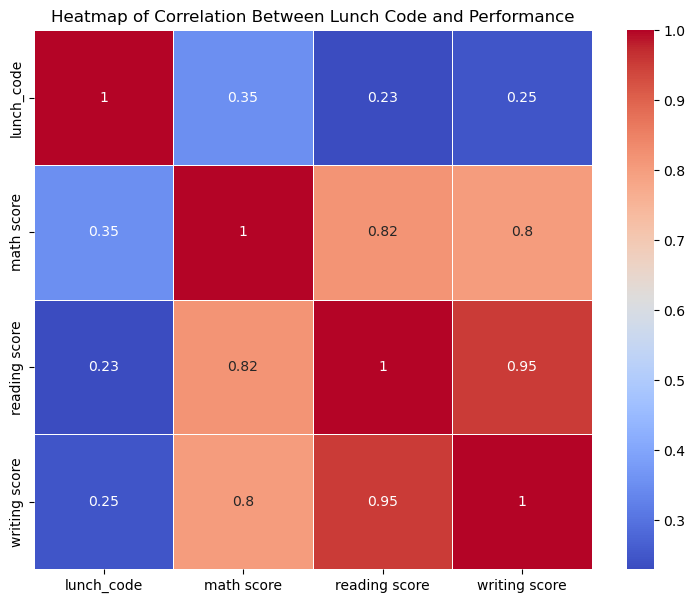

In [22]:
# Plot heatmap
plt.figure(figsize=(9, 7))
sb.heatmap(corr,
            annot=True,        # Show correlation values inside boxes
            cmap='coolwarm',  # Color scheme
            linewidth =0.5,
            xticklabels=True,  # Show column names (optional, True by default)
            yticklabels=True   # Show row names (optional, True by default)
           )
plt.title("Heatmap of Correlation Between Lunch Code and Performance")
plt.show()

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


<Axes: xlabel='test preparation course'>

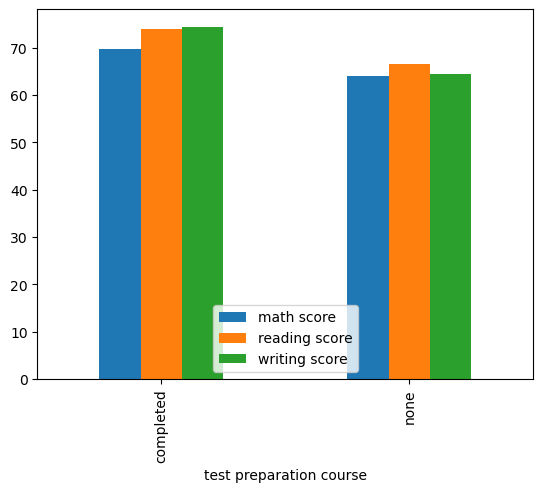

In [23]:
# Objective 2.3
average_scores_test_preparation_course = combined.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(average_scores_test_preparation_course)
average_scores_test_preparation_course.plot(kind = 'bar')

In [24]:
# Map the test preparation categories to numbers
test_category = {
    "none": 1,
    "completed":2
}

# Create a new column with the numeric values
combined['Test_code'] = combined['test preparation course'].map(test_category)

# Preview
combined



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,education_code,lunch_code,Test_code
0,male,group A,associate's degree,free/reduced,none,47,57,44,4,1,1
1,male,group A,some college,standard,completed,78,72,70,3,2,2
2,female,group A,master's degree,standard,none,50,53,58,6,2,1
3,male,group A,master's degree,free/reduced,none,73,74,72,6,1,1
4,female,group A,associate's degree,standard,completed,55,65,62,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,associate's degree,standard,none,100,100,100,4,2,1
996,female,group E,associate's degree,standard,none,68,76,67,4,2,1
997,male,group E,some high school,standard,completed,81,75,76,1,2,2
998,male,group E,high school,free/reduced,completed,86,81,75,2,1,2


In [25]:
# Calculating covariance and correlation

cov_math = np.cov(combined['Test_code'],combined['math score'])
corr = combined[['Test_code','math score','reading score','writing score']].corr()
print(cov_math)
print(corr)

[[  0.23006607   1.29243043]
 [  1.29243043 229.918998  ]]
               Test_code  math score  reading score  writing score
Test_code       1.000000    0.177702       0.241780       0.312946
math score      0.177702    1.000000       0.817580       0.802642
reading score   0.241780    0.817580       1.000000       0.954598
writing score   0.312946    0.802642       0.954598       1.000000


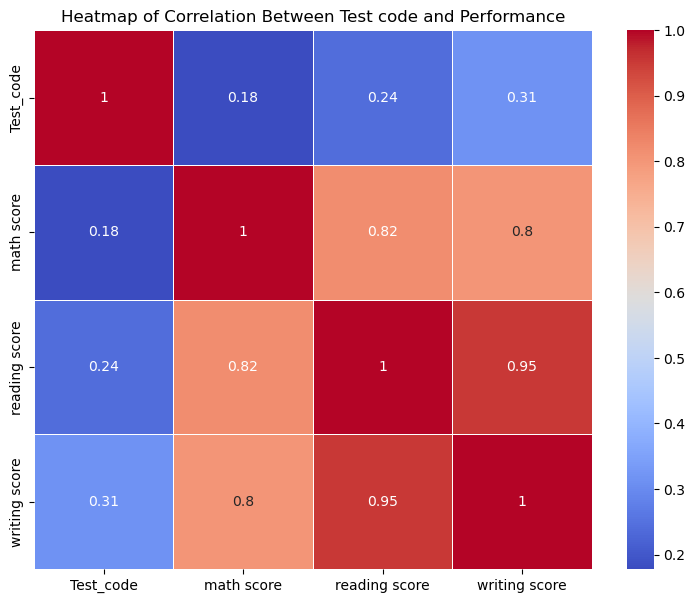

In [26]:
# Plot heatmap
plt.figure(figsize=(9, 7))
sb.heatmap(corr,
            annot=True,        # Show correlation values inside boxes
            cmap='coolwarm',  # Color scheme
            linewidth =0.5,
            xticklabels=True,  # Show column names (optional, True by default)
            yticklabels=True   # Show row names (optional, True by default)
           )
plt.title("Heatmap of Correlation Between Test code and Performance")
plt.show()